<a href="https://colab.research.google.com/github/fkrhtmq123/Tensorflow/blob/master/tf12_auto_encoder_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
"""
  날짜 : 2020/08/25
  이름 : 김동욱
  내용 : 딥러닝 오토인코더(AutoEncoder) 개념 실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [37]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [41]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape

(60000, 784)

In [42]:
# 오토인코더 모델 구성
inputs = Input(shape=(784,))

hidden = Dense(32, activation='relu')(inputs)

outputs = Dense(784, activation='sigmoid')(hidden)

auto_encoder = Model(inputs, outputs)
auto_encoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 설정하기
auto_encoder.compile(optimizer='Adam', loss='binary_crossentropy')
auto_encoder.fit(x_train, 
                 x_train, 
                 epochs=20, 
                 batch_size=256)

In [44]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[3.8879970e-09, 2.1166473e-09, 8.7718695e-09, ..., 3.0830163e-10,
        1.9415780e-09, 6.3814216e-09],
       [2.4482662e-11, 5.1549137e-10, 1.5071347e-10, ..., 3.5308804e-11,
        8.3676177e-10, 2.1173770e-10],
       [2.0596494e-06, 1.8268066e-06, 9.7940401e-06, ..., 5.6541257e-06,
        6.1733599e-06, 5.5315249e-06],
       ...,
       [1.3105287e-13, 7.9568120e-14, 2.7067847e-12, ..., 4.8983861e-14,
        2.1771767e-14, 7.4932519e-13],
       [9.6212005e-12, 1.3025114e-10, 7.4972625e-11, ..., 8.1962544e-12,
        1.8732318e-10, 8.7873681e-11],
       [2.3532824e-17, 2.2337299e-15, 4.6343692e-16, ..., 3.5260847e-17,
        2.8331063e-16, 3.8640025e-15]], dtype=float32)

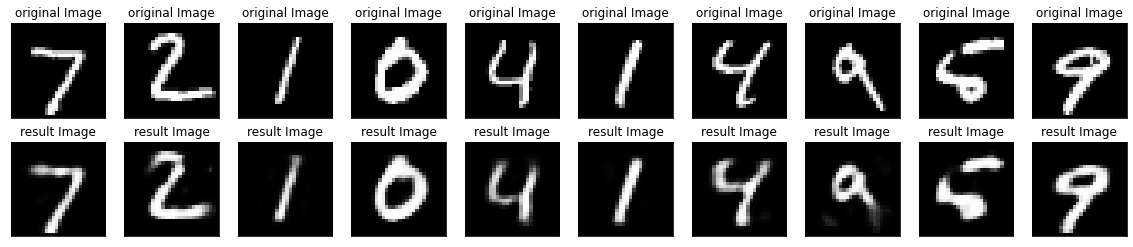

In [46]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # 오리지날 이미지
  ax = plt.subplot(2, 10, i + 1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i + 11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)